In [1]:
import numpy as np
from numpy.random import SeedSequence
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:ylabel='Count'>

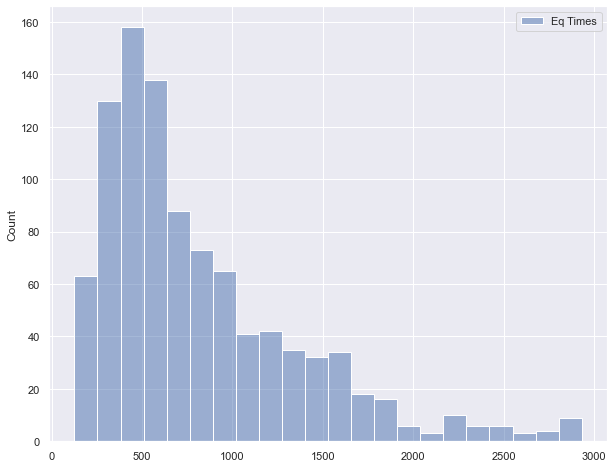

In [2]:
df = pd.read_csv('../GameOfLifeData.csv')
sns.set_theme()
fig = plt.figure(figsize=(10,8))
sns.histplot(data=df)
# Histogram plot showing bins with equilibration times

In [ ]:
# Code to check how to use np.roll for GameOfLife and 
# check how much faster this is than using for loops

In [93]:
def getLiveNN(arr, l: int, row: int, col: int) -> int:
   return arr[row-1, col]         + arr[(row+1) % l, col]   + \
          arr[row, col-1]         + arr[row, (col+1) % l]   + \
          arr[row-1, col-1]       + arr[row-1, (col+1) % l] + \
          arr[(row+1) % l, col-1] + arr[(row+1) % l, (col+1) % l]

def updateCells(array, l):
        temporaryArray = np.copy(array)
        for row in range(l):
            for col in range(l):
                cell = temporaryArray[row, col]
                liveNN = getLiveNN(temporaryArray, l, row, col)
                # if cell is alive (cell == 1)
                if cell:
                    if liveNN < 2 or liveNN > 3:
                        # any live cell with less than 2 live nn dies
                        # any live cell with more than 3 live nn dies
                        array[row, col] = 0
                # else, cell is dead, cell == 0
                else:
                    if liveNN == 3:
                        # any dead cell with 3 live nn becomes alive
                        array[row, col] = 1

def updateCells_fast(array):
    # nn for left - right - up -down
    live_nn = np.roll(array, 1, axis=0) + np.roll(array, 1, axis=1) + \
        np.roll(array, -1, axis=0) + np.roll(array, -1, axis=1) + \
        np.roll(array, (1, 1), axis=(0, 1)) + np.roll(array, (-1, 1), axis=(0, 1)) + \
        np.roll(array, (1, -1), axis=(0, 1)) + np.roll(array, (-1, -1), axis=(0, 1))   

    # bool mask to distinguish those cells that will die
    mask = (live_nn > 3) | (live_nn < 2)
    make_dead = mask * array
    # cells with exactly 3 nn become alive
    make_alive = ((live_nn == 3) * ~array.astype(bool)) * 1
    # use bool masks to create the array containing the live/dead cells
    new_arr = np.where(make_dead, 0, array)
    new_arr = np.where(make_alive, 1, new_arr)
    array = new_arr

In [94]:
rng = np.random.default_rng(SeedSequence(14122000))
l = 50
array = rng.choice(2, size=(50, 50))

In [95]:
%timeit updateCells(array, l) 

4.59 ms ± 197 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [96]:
%timeit updateCells_fast(array)

161 µs ± 1.84 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
